# Making Graphs

It's important makes graphs solutions and is very useful have the knowledge about the graphs.

## Numpy Library
Is very useful for make arrays.

## Matplotlib Library
Is very useful for make grpahs.

[1 2 3 4 5] [4 5 6 7 8]


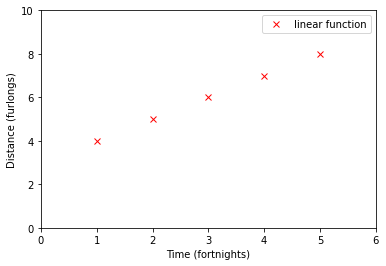

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1,2,3,4,5])
y=x+3
print(x,y)

plt.plot(x,y,'rx')
plt.title=("My first graph")
plt.xlabel('Time (fortnights)')
plt.ylabel('Distance (furlongs)')
plt.xlim(0, 6)
plt.ylim(0, 10)
plt.legend(["linear function"], loc='upper right')

Text(0.5, 0, 'Time (s)')

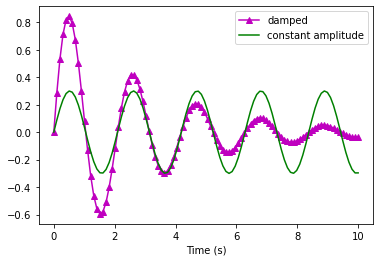

In [2]:
time = np.linspace(0.0, 10.0, 100)
height = np.exp(-time/3.0)*np.sin(time*3)
plt.figure()
plt.plot(time, height, 'm-^')
plt.plot(time, 0.3*np.sin(time*3), 'g-')
plt.legend(['damped', 'constant amplitude'], loc='upper right')
plt.xlabel('Time (s)')

# Example 1. Kirchoff Laws

<p>In electronics, Kirchho's laws are used to solve for the currents
through components in circuit networks. Applying these laws
gives us systems of linear equations, which can then be expressed
as matrix equations, such as</p>

$$
\begin{pmatrix}
-13 & 2 & 4\\
2 & 11 & 6\\
4 & 6 & -15
\end{pmatrix}
\begin{pmatrix}
I_A\\
I_B\\
I_C
\end{pmatrix}
=
\begin{pmatrix}
5\\
-10\\
5
\end{pmatrix}
$$

In [3]:
A = np.matrix([ [-13,2,4], [2,-11,6], [4,6,-15] ])
B = np.array([5,-10,5])

print(A)
print(B)
np.linalg.solve(A,B)

[[-13   2   4]
 [  2 -11   6]
 [  4   6 -15]]
[  5 -10   5]


array([-0.28624535,  0.81040892, -0.08550186])

This is the equation solution verified in **Excel**
<!-- <img src="resource\solution_verified.png" alt="Alternative text" /> -->
<img src="solution_verified.png" alt="Alternative text" />

# Problems
---
**0.0.** Graph both of the following functions on a single figure, with a usefullysized
scale.

A.*$$x^4 \exp^{-2x}$$* 
B.$$x^2 \exp^{-x} \sin(x^2)$$

**SOLUTION:** I use linspace from numpy to plot this graps.

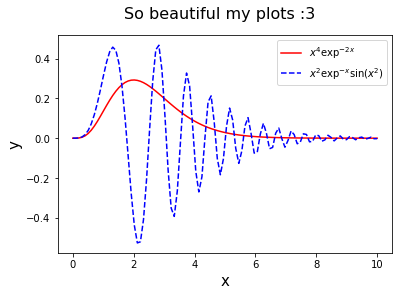

In [4]:
#Plot A
x = np.linspace(0.0, 10.0, 100)
y1 = np.power(x,4) * np.exp(-2*x)  #exp(-time/3.0)*np.sin(time*3)
y2 = np.power(x,2) * np.exp(-x) * np.sin(np.power(x,2))
fig=plt.figure()
plt.plot(x, y1, 'r-')
plt.plot(x, y2, 'b--')
plt.legend(['$x^4 \exp^{-2x}$', '$x^2 \exp^{-x} \sin(x^2)$'], loc='upper right')
# plt.xlim(0, 4)
# plt.ylim(-0.5, 100)
plt.xlabel('x', fontsize=15)
plt.ylabel('y', fontsize=15)

fig.suptitle('So beautiful my plots :3', fontsize=16)

plt.show()

**0.1.** The data shown in figure 2 is most usefully analyzed by looking at the
ratio of the two microphone signals. Plot this ratio, with frequency
on the x axis. Be sure to clean up the graph with appropriate scales,
axes labels, and a title.

**SOLUTION:** In first time we plot the original graphs to verify the data. Later we plot the ratio $\left(\frac{Microphone1}{Microphone2}\right)$  in function of frecuency, when before we verify that both arrays have the same size for avoid any problem in this operation. We use the property that we divide the arrays, this arrays operates element by element.

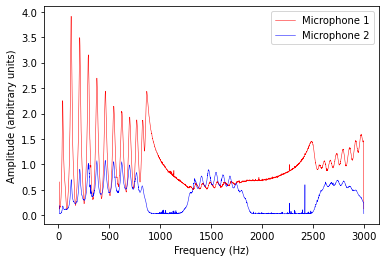

[0.654 0.127 0.12  ... 1.466 1.458 0.125] [0.192 0.032 0.03  ... 0.246 0.235 0.031] [3.40625    3.96875    4.         ... 5.95934959 6.20425532 4.03225806]
2990 2990 2990


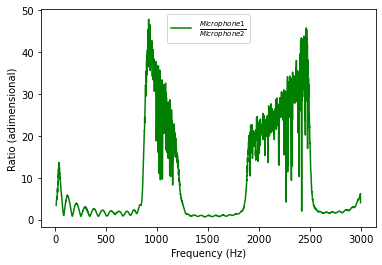

In [5]:
import numpy as np
import matplotlib.pyplot as plt

frequency, mic1, mic2 = np.loadtxt('resource/microphones.txt', unpack = True)

fig=plt.figure()
plt.plot(frequency, mic1, 'r-', frequency, mic2, 'b-', linewidth=0.5)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (arbitrary units)')
plt.legend(['Microphone 1', 'Microphone 2'])
plt.show()

ratio=mic1/mic2
print(mic1, mic2, ratio)
print(mic1.size, mic2.size, ratio.size)

fig=plt.figure()
plt.plot(frequency, ratio, 'g-')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Ratio (adimensional)')
plt.legend([r'$\frac{Microphone1}{Microphone2}$'], loc='upper center')
plt.show()

**0.2.** The file Ba137.txt contains two columns. The first is counts from a
Geiger counter, the second is time in seconds.
* (a) Make a useful graph of this data.
* (b) If this data follows an exponential curve, then plotting the natural
log of the data (or plotting the raw data on a logrithmic scale) will
result in a straight line. Determine whether this is the case, and
explain your conclusion with |you guessed it| an appropriate
graph.

**SOLUTION:** In first time we plot the two columns to verify data when the fisst column is the Geiger count (G) and the time (t) in seconds. This plot shown (apparently) an exponential behaviour, with $G = b \exp(q t)$

---
Later we plot the log(G) in funtion of time and also plot line of best fit over than other plot. For verified this values we makes the regression with $\log(G)= \log(b) + qt$, and using the function __np.polyfit__ to make the linear regression. Find that the best fit approximation with this assumptions is $G = 29547 e^{-0.004143 Hz * t} $

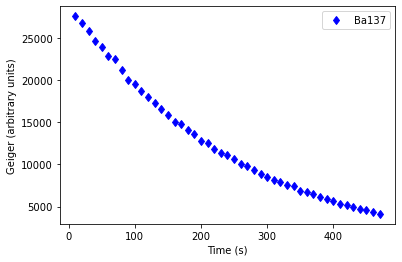

a:-0.004143, b=:29547.305765


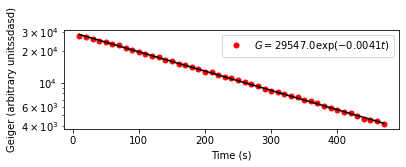

In [6]:
Geiger, seconds = np.loadtxt('resource/Ba137.txt', unpack = True)

#Plot the raw dates
fig=plt.figure()
# ax1=fig.add_subplot(1, 2, 1)
plt.plot(seconds, Geiger, 'bd')
plt.xlabel('Time (s)')
plt.ylabel('Geiger (arbitrary units)')
plt.legend(['Ba137'])
plt.show()

##Find the exp regression
logGeiger=np.log(Geiger)
a, b = np.polyfit(seconds, logGeiger, 1)
print("a:"+str(round(a,6))+", b=:"+str(round(np.exp(b),6)))
# print("$G ={} \exp({} t)$".format(np.exp(b), a))
best_fit=np.exp(b+a*seconds)
# print(best_fit)

##Plot scale y
fig=plt.figure()
ax2=fig.add_subplot(2, 1, 1)
plt.plot(seconds, Geiger, 'ro', seconds, best_fit, 'black', markersize=5)
# plt.plot(seconds, logG, 'g-')
plt.xlabel('Time (s)')
ax2.set_yscale('log')
plt.ylabel('Geiger (arbitrary unitssdasd)')
plt.legend(["$G ={} \exp({} t)$".format(round(np.exp(b),-0), round(a,4))])
# plt.legend(['Ba137'])
plt.show()

**0-3** The data in file Ba137.txt is actual data from a radioactive decay
experiment; the firrst column is the number of decays N, the second is
the time t in seconds. We'd like to know the half-life $t_{1/2}$ of $^{137}Ba$. It
should follow the decay equation 

$$N = N_0 e^{-\lambda t}$$

where $\lambda = \frac{\ln 2}{t_{1/2}}$ Using the techniques you've learned in this chapter,
load the data from file Ba137.txt into appropriately-named variables
in an ipython session. Experiment with diferent values of N and $\lambda$
and plot the resulting equation on top of the data. (Python uses exp()
calculate the exponential function: i.e. $y = A \exp(-L*time)$ ) Don't
worry about automating this process yet (unless you really want to!)
just try adjusting things by hand until the equation matches the data
pretty well. What is your best estimate for $t_{1/2}$?

# Solution:

Based in the last exercise, we calculate the linear regression, which $\lambda = 0.004143 Hz$, we calculate a half-life of $t_{1/2} = 167.29856245072952 \mathbf{s}$

In [7]:
t_12=np.log(2)/(-a)

print("lambda= "+str(-a)+" Hz")
print("t_1/2= "+str(t_12)+" s")

lambda= 0.0041431747553962485 Hz
t_1/2= 167.29856245072952 s


**0-4.** The normal modes and angular frequencies of those modes for a linear
system of four coupled oscillators of mass m, separated by springs of
equal strength k, are given by the eigenvectors and eigenvalues of M,
shown below.

$$
\begin{pmatrix}
2  & -1 & 0  & 0\\
-1 & 2 & -1 & 0\\
0  & -1 & 2  & -1\\
0  & 0  & -1 & 2
\end{pmatrix}
$$

(The eigenvalues give the angular frequencies $\omega$ in units of $\sqrt\frac{k}{m}$.) Find
those angular frequencies.

# Solution:

We calculated the eigenvalues of the matrix with numpy function **np.linalg.eigvals**, which returns this values. And we find the next values $\lambda_1 = 3.618$, $\lambda_2 = 2.618$, $\lambda_3 = 0.381$ and $\lambda_4 = 1.381$

In [73]:
A = np.matrix([ [2, -1, 0, 0], [-1,2,-1,0], [0,-1,2,-1],[0,0,-1,2] ])

print(A)
w= np.linalg.eigvals(A)

print(w)

[[ 2 -1  0  0]
 [-1  2 -1  0]
 [ 0 -1  2 -1]
 [ 0  0 -1  2]]
[3.61803399 2.61803399 0.38196601 1.38196601]
